In [1]:
import sys,os,os.path

# tell python to look for the path to analyse
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
from os import walk
from os.path import exists
from os import mkdir
from scipy import stats
import h5py
import pandas as pd
import tables as tb
from tqdm import tqdm

from core import processing as proc
from core import plotting as pl
from core import misc as misc

In [2]:
# set yout full path
storage = "/home/e78368jw/Documents/TPB_Project/Wavedump_Wrapper_TPB/storage/"
RUN_NO = "RUN000065"
PATH = storage + "John/testing/" + RUN_NO + "/PMT/Nominal/"
event_name = "wave_6.h5"
output_dir = storage + "John/testing/RUN000065/PMT/"


In [3]:
#data_path = '/home/e78368jw/Documents/TPB_Project/Wavedump_Wrapper_TPB/storage/John/testing/RUN000065/PMT/Nominal/wave_6.h5'
#f = h5py.File(data_path)
f = h5py.File(PATH + event_name)
# keys of the file
print(list(f.keys()))
# shape
print(f['pmtrw'])
# event
print(f['pmtrw'][0])


['ADC', 'pmtrw']
<HDF5 dataset "pmtrw": shape (2046, 150000), type "<u2">
[8195 8203 8199 ... 8197 8201 8195]


### Visualise events

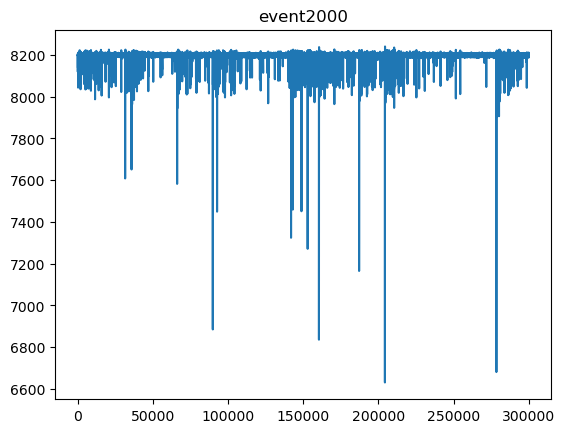

In [4]:
# visualise events
q = 2000
length = len(f['pmtrw'][q])

time = np.linspace(0,length*2, num = length)
plt.plot(time, f['pmtrw'][q])
plt.title('event' + str(q))
plt.show()

### Calculate the ADC values for charged histogram

In [5]:
ADC_list = []
print("Cooking data...")
# collect ADC values over all array positions
for i in tqdm(range(len(f['pmtrw']))):
    # collect event
    a = f['pmtrw'][i]

    # flip to positive
    a = -a
    b = proc.subtract_baseline(a, type = 'median')
    c = proc.integrate_range(b, window = 10, debug=False)

    ADC_list += (c),
    

Cooking data...


  0%|          | 0/2046 [00:00<?, ?it/s]

100%|██████████| 2046/2046 [00:04<00:00, 491.81it/s]


Displaying ADC data...
Min: 2690.0      Max: 10740.0


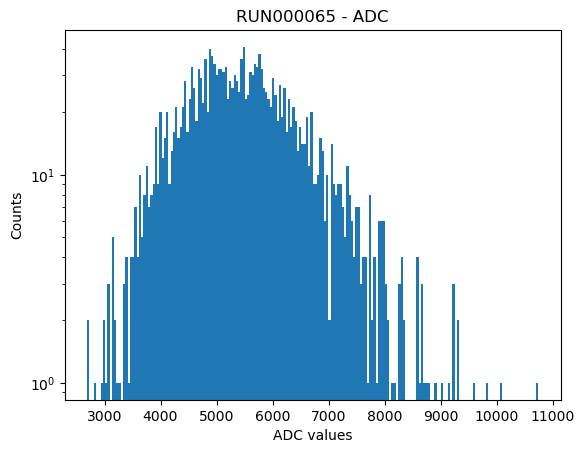

In [6]:
print("Displaying ADC data...")
print("Min: {}      Max: {}".format(min(ADC_list), max(ADC_list)))
plt.hist(ADC_list, bins = 200)
plt.yscale('log')
plt.title(RUN_NO + " - ADC")
plt.xlabel('ADC values')
plt.ylabel('Counts')
plt.show()

In [27]:
print(ADC_list)

[8.0, 4.0, 5.0, -5.0, 19.0, 11.0, -8.0, -9.0, 9.0, -7.0, -6.0, -16.0, 12.0, 7.0, 10.0, 1.0, 2.0, -4.0, -5.0, 7.0, 8.0, 14.0, 5.0, 14.0, -9.0, -11.0, 19.0, 22.0, 6.0, 1.0, 7.0, -6.0, -3.0, -2.0, -7.0, -10.0, 0.0, 1.0, 0.0, -8.0, 3.0, 8.0, -12.0, -21.0, 1.0, 8.0, -30.0, 9.0, 13.0, 3.0, 3.0, -4.0, 6.0, -6.0, 2.0, 12.0, 3.0, -4.0, -7.0, -12.0, -3.0, 7.0, -16.0, 7.0, 2.0, -7.0, 17.0, -14.0, -1.0, 13.0, -4.0, 7.0, -4.0, -10.0, 21.0, 5.0, 10.0, 13.0, 10.0, 20.0, -8.0, -7.0, -6.0, 4.0, 13.0, -10.0, -3.0, 5.0, 21.0, 22.0, 15.0, 4.0, -3.0, 4.0, 0.0, 2.0, 7.0, 14.0, -17.0, 6.0, -3.0, 8.0, 9.0, 25.0, 21.0, -24.0, 8.0, 15.0, 12.0, -4.0, 18.0, 14.0, 12.0, 18.0, -2.0, -9.0, -18.0, 13.0, 11.0, 6.0, -13.0, -3.0, 3.0, -1.0, -1.0, 0.0, 9.0, -12.0, 1.0, -2.0, 13.0, 11.0, 14.0, -8.0, 4.0, -9.0, 31.0, -9.0, 5.0, 1.0, -1.0, -1.0, 3.0, -4.0, 0.0, 24.0, -5.0, 10.0, 3.0, -9.0, -7.0, -9.0, -16.0, 1.0, 5.0, 17.0, 0.0, -19.0, 2.0, 10.0, 6.0, 22.0, -3.0, -9.0, 0.0, 3.0, 10.0, -17.0, 1.0, -12.0, 11.0, 11.0, 10.0, 10